# Jock's Box

**Organization:** Rice Data Science Club, DEEP Project Team

**Mentor:** Jason Gardner

**Mentee:** Aaron Chang, Kai Hung, Ankit Patel, Nathan Powell, Sanjay Rajasekhar, Daniel Sedano, Luke Stancil, Brian Xu, Jeffrey Zhong

**Data Set:** NBA Enhanced Box Score and Standings (2012-2018 Official Box Scores) https://www.kaggle.com/pablote/nba-enhanced-stats 

**Objective:** Craft a prediction model for win_rate based on the relationship between the frequency of effective 3-point shots and the win percentage of an NBA team. 

**How:** We need to split the dataset into a weighted average of three shots attempted per team out of their total shots attempted and their win percentage. 

Our explanatory variable *effective_three_point_percentage*, will be obtained by multiplying the fraction of three point shots attempted over total shots and the three point shot percentage made. 

Our response variable, *win_rate*, will be the win rate data of each team. 



In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

We will be using the python libraries seaborn, pandas, and matplotlib in our analysis. 

In [6]:
nba_complete_df = pd.read_csv("/content/2012-18_officialBoxScore.csv")

Let's take a look at how our data is organized. 

In [7]:
nba_complete_df.head()

,gmDate,gmTime,seasTyp,offLNm,offFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,...,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,...,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Smith,Michael,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,...,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
2,2012-10-30,19:00,Regular,Workman,Haywoode,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,...,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
3,2012-10-30,19:00,Regular,Brothers,Tony,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,...,0.4138,32,8,0.25,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4,46.1538,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
4,2012-10-30,19:00,Regular,Smith,Michael,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,...,0.4138,32,8,0.25,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4,46.1538,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409


Let's prepare some sub-data-frames to represent out data. We will want to take a look at the distribution of three pointers out of total field goals attempted by teams. But, we will deal with the teams aspect in a bit. 

In [67]:
two_pointers_attempted = nba_complete_df.loc[:, "team2PA"]

teams = nba_complete_df.loc[:, "teamAbbr"]

three_pointers_made = nba_complete_df.loc[:, "team3PM"].astype(float)
three_pointers_attempted = nba_complete_df.loc[:, "team3PA"].astype(float)

# need to somehow add the three pointers and two points to count the total attempts
# total_attempted = two_pointers_attempted .add(three_pointers_attempted, fill_value = 0)

total_attempted = nba_complete_df.loc[:, "teamFGA"].astype(float)

proportion_three_pointers = three_pointers_attempted.divide(total_attempted)

proportion_three_pointers.columns = ["index", "%3A"]

# the name doesn't show up ugh....

proportion_three_pointers.head()

0    0.355556
1    0.355556
2    0.355556
3    0.253165
4    0.253165
dtype: float64

Now, we need to identify the win percentage of each team

In [74]:
wins_df = nba_complete_df.loc[nba_complete_df.teamRslt == "Win"]
wins_df = wins_df.loc[:, ["teamAbbr"]].value_counts()
losses_df = nba_complete_df.loc[nba_complete_df.teamRslt == "Loss"]
losses_df = losses_df.loc[:, ["teamAbbr"]].value_counts()

proportion_wins_by_team_df = pd.DataFrame(wins_df / (wins_df + losses_df))

#again, doing this wrong

proportion_wins_by_team_df.rename(columns={"": "win_rate"}) 
# this is the dataframe of proportion wins!
proportion_wins_by_team_df.head()

,0
teamAbbr,
ATL,0.522358
BKN,0.406504
BOS,0.532926
CHA,0.440678
CHI,0.514557


Now we need to group our data by team names

  teamAbbr         0    teamFGA
0      ATL  0.322633  83.105691
1      BKN  0.302342  82.851626
2      BOS  0.298962  85.183978
3      CHA  0.276219  84.025763
4      CHI  0.255678  84.677048


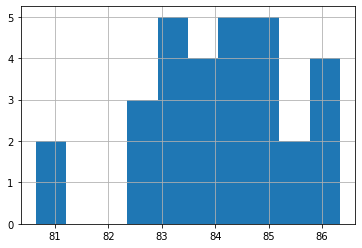

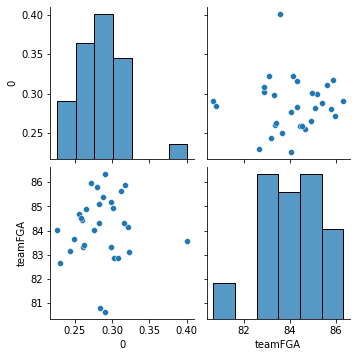

In [80]:
#proportion_threes_by_team = pd.concat([teams, proportion_three_pointers, total_attempted, proportion_wins_by_team_df], axis=1, sort=False)

proportion_threes_by_team = pd.DataFrame(pd.concat([teams, proportion_three_pointers, total_attempted], axis=1, sort=False))
proportion_threes_by_team = pd.DataFrame(proportion_threes_by_team.groupby("teamAbbr").mean().reset_index())

# figure out a way to rename the data frame in column "0" 
proportion_threes_by_team.rename(columns={0: "%3A"})
# rename experiment ends.
print(proportion_threes_by_team.head())
proportion_threes_by_team["teamFGA"].hist(bins=10)

chart = sns.pairplot(data=proportion_threes_by_team)




Let's graph our data and see how the distributuon of three pointers shot across the league looks

Now, it's time to plot the data and see if we can find any potential relationships between the different variables.



*   Does more percentage three pointers attempted typically lead to better win rate? 
*   How does the league's general ratio of two pointers attempt vs. three pointers attempt look? 
*   Which teams are especially good for three point heavy strategies? Or are they all relatively doing well in terms of how their win rate fair for the average team adopting their strategy? 

Note that we are splitting teams into two categories
* 3 Point Heavy (>50% attempted shots are 3 pointers)
* 2 Point Heavy (<50% attempted shots are 2 pointers)


